In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

sns.set_style("whitegrid")

RAW_PATH = "../../data/raw/newtons_second_law_dataset.csv"
PROCESSED_PATH = "../../data/processed/newtons_second_law_cleaned_dataset.csv"

if not os.path.exists(RAW_PATH):
    raise FileNotFoundError(f"Raw dataset not found at: {RAW_PATH}")

In [10]:

df = pd.read_csv(RAW_PATH)
print(f"🔹 Raw dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()

🔹 Raw dataset loaded: 3000 rows × 3 columns


,Mass_kg,Acceleration_ms2,Force_N
0,4.058131,13.486790,54.731161
1,9.531786,15.953960,152.069729
2,7.453942,5.084311,37.898163
3,6.187256,12.534995,77.557215
4,1.982177,11.477745,22.750923


In [11]:
missing = df.isnull().sum()
print("Missing values:\n", missing)

if missing.sum() == 0:
    print("✅ No missing values found.")
else:
    print("⚠️ Warning: Missing values detected.")

Missing values:
 Mass_kg             0
Acceleration_ms2    0
Force_N             0
dtype: int64
✅ No missing values found.


In [12]:
if not all(np.issubdtype(df[col].dtype, np.number) for col in df.columns):
    print("⚠️ Non-numeric columns found.")
else:
    print("✅ All columns are numeric.")

✅ All columns are numeric.


In [13]:
df_cleaned = df.copy()

invalid = df_cleaned[(df_cleaned["Mass_kg"] <= 0) | (df_cleaned["Acceleration_ms2"] <= 0)]
print(f"⚠️ Invalid rows to drop: {invalid.shape[0]}")

df_cleaned = df_cleaned[(df_cleaned["Mass_kg"] > 0) & (df_cleaned["Acceleration_ms2"] > 0)]
print(f"✅ Cleaned dataset shape: {df_cleaned.shape}")

⚠️ Invalid rows to drop: 0
✅ Cleaned dataset shape: (3000, 3)


In [14]:
df_cleaned["recomputed_force"] = df_cleaned["Mass_kg"] * df_cleaned["Acceleration_ms2"]
df_cleaned["error"] = np.abs(df_cleaned["recomputed_force"] - df_cleaned["Force_N"])

tolerance = 1e-6
initial = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned["error"] < tolerance]
print(f"✅ Removed {initial - df_cleaned.shape[0]} rows due to force inconsistency.")

✅ Removed 0 rows due to force inconsistency.


In [15]:
df_cleaned.drop(columns=["recomputed_force", "error"], inplace=True)

os.makedirs(os.path.dirname(PROCESSED_PATH), exist_ok=True)

df_cleaned.to_csv(PROCESSED_PATH, index=False)
print(f"✅ Cleaned dataset saved to: {PROCESSED_PATH}")


✅ Cleaned dataset saved to: ../../data/processed/newtons_second_law_cleaned_dataset.csv


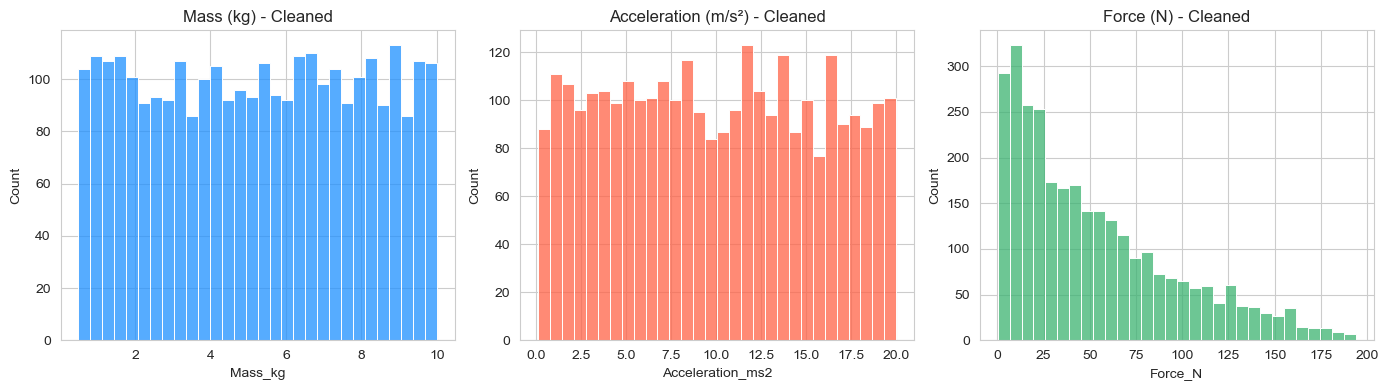

In [16]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_cleaned["Mass_kg"], bins=30, color="dodgerblue")
plt.title("Mass (kg) - Cleaned")

plt.subplot(1, 3, 2)
sns.histplot(df_cleaned["Acceleration_ms2"], bins=30, color="tomato")
plt.title("Acceleration (m/s²) - Cleaned")

plt.subplot(1, 3, 3)
sns.histplot(df_cleaned["Force_N"], bins=30, color="mediumseagreen")
plt.title("Force (N) - Cleaned")

plt.tight_layout()
plt.show()